In [1]:
import xml.etree.ElementTree as ET
import folium
import random

osm_file = 'map.osm'  # Replace with your file path

In [2]:
# Function to parse the OSM file and extract street lamps
def extract_street_lamps(osm_file):
    tree = ET.parse(osm_file)
    root = tree.getroot()
    street_lamps = []

    for node in root.findall('node'):
        for tag in node.findall('tag'):
            if tag.get('k') == 'highway' and tag.get('v') == 'street_lamp':
                lat = float(node.get('lat'))
                lon = float(node.get('lon'))
                street_lamps.append((lat, lon))

    return street_lamps

street_lamps = extract_street_lamps(osm_file)
#print(street_lamps)


In [3]:
# Function to calculate the center of the street lamps
def calculate_center(street_lamps):
    if not street_lamps:
        return None, None

    sum_lat = sum(lamp[0] for lamp in street_lamps)
    sum_lon = sum(lamp[1] for lamp in street_lamps)
    num_lamps = len(street_lamps)

    return sum_lat / num_lamps, sum_lon / num_lamps

center_lat, center_lon = calculate_center(street_lamps)
print(f"Center Latitude: {center_lat}, Center Longitude: {center_lon}")

Center Latitude: 56.175855449676924, Center Longitude: 10.191713261481048


In [4]:
# Create a map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)  # Replace latitude, longitude with your map's central point

# Add street lamps to the map
for lamp in street_lamps:
    folium.Marker([float(lamp[0]), float(lamp[1])], popup='Street Lamp').add_to(m)

# Save the map to an HTML file
m.save('street_lamps_map.html')

# Update Folium marker code to include on/off status
for lamp in street_lamps:
    status = 'On' if random.choice([True, False]) else 'Off'
    icon_color = 'green' if status == 'On' else 'red'
    folium.Marker(
        [float(lamp[0]), float(lamp[1])], 
        popup=f'Street Lamp: {status}',
        icon=folium.Icon(color=icon_color)
    ).add_to(m)

m.save('street_lamps_map_with_status.html')


In [5]:
import math

# Function to calculate distance between two points
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = R * c
    return distance

# Define communication range in kilometers
COMMUNICATION_RANGE = 0.5  # for example, 500 meters

# Function to find connected lamps
def find_connected_lamps(street_lamps):
    connected_lamps = {}
    for i, lamp1 in enumerate(street_lamps):
        connections = []
        for j, lamp2 in enumerate(street_lamps):
            if i != j:
                distance = calculate_distance(lamp1[0], lamp1[1], lamp2[0], lamp2[1])
                if distance <= COMMUNICATION_RANGE:
                    connections.append(j)
        connected_lamps[i] = connections
    return connected_lamps

# Use the function to find connected lamps
connected_lamps = find_connected_lamps(street_lamps)

# Example: Print connected lamps
for lamp in connected_lamps:
    print(f"Lamp {lamp} is connected to lamps {connected_lamps[lamp]}")

Lamp 0 is connected to lamps [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 393, 394, 395, 396, 397, 398, 399, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 644, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 742, 743, 744, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 84

In [6]:
# Define communication range in meters (e.g., 500 meters)
COMMUNICATION_RANGE = 500

# Create a map object
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)

# Add street lamps and their communication range to the map
for lamp in street_lamps:
    # Add Marker for the street lamp
    status = 'On' if random.choice([True, False]) else 'Off'
    icon_color = 'green' if status == 'On' else 'red'
    folium.Marker(
        [float(lamp[0]), float(lamp[1])], 
        popup=f'Street Lamp: {status}',
        icon=folium.Icon(color=icon_color)
    ).add_to(m)

    # Add Circle to represent communication range
    folium.Circle(
        radius=COMMUNICATION_RANGE,
        location=[float(lamp[0]), float(lamp[1])],
        color='blue',
        fill=True,
        fill_opacity=0.1
    ).add_to(m)

# Save the map with communication ranges
m.save('C:/Users/basti/Desktop/3Sem/StudieCourse/Networking/street_lamps_map_with_communication_range.html')

In [7]:
!pip install cartopy
!pip install contextily


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\basti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\basti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


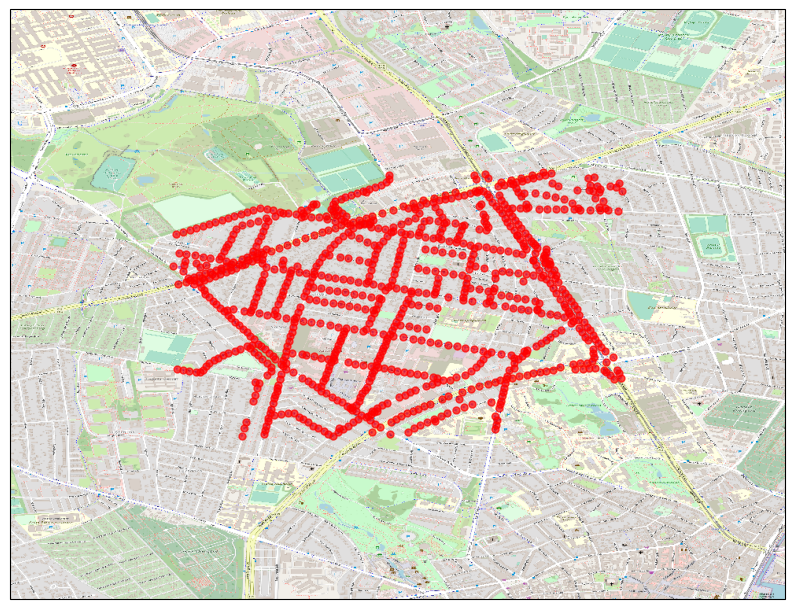

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import math

# Create an OpenStreetMap instance
osm_tiles = OSM()

# Assuming your street_lamps data is already defined
street_lamps = extract_street_lamps(osm_file)

# Define communication range in degrees (approximation)
# Define communication range in meters
COMMUNICATION_RANGE = 500  # 500 meters

# Create a plot with a geographic projection
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add OpenStreetMap tiles at a zoom level of 8
ax.add_image(osm_tiles, 8)

# Add each street lamp to the map
for lamp in street_lamps:
    lat, lon = lamp
    ax.plot(lon, lat, marker='o', color='red', markersize=5, alpha=0.7, transform=ccrs.Geodetic())

    # Draw a circle for the communication range
    circle = plt.Circle((lon, lat), COMMUNICATION_RANGE/111139, color='blue', alpha=0.3, transform=ccrs.Geodetic())
    ax.add_artist(circle)

# Set the extent of the map (this may need adjusting depending on your data)
ax.set_extent([min(lamp[1] for lamp in street_lamps) - 0.01, 
               max(lamp[1] for lamp in street_lamps) + 0.01, 
               min(lamp[0] for lamp in street_lamps) - 0.01, 
               max(lamp[0] for lamp in street_lamps) + 0.01], 
              crs=ccrs.PlateCarree())

plt.show()




# Create a new figure and set up the projection
fig, ax = plt.subplots(subplot_kw={'projection': osm_tiles.crs}, figsize=(14, 14))

# Set map extent to focus on Denmark
ax.set_extent([8, 13, 54.5, 58])

# Add OpenStreetMap tiles at a zoom level of 8
ax.add_image(osm_tiles, 8)

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
gl.top_labels = gl.right_labels = False

# Plot each place on the map with the 'Count' determining marker_size
for index, row in df_traffic.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    count = row['Normalized_Count']
    
    # Scale the marker size by some factor. Here, '0.1' is an arbitrary factor to scale your sizes.
    # You can adjust this factor to get a desirable marker size on your map.
    marker_size = count * 30  # Adjust this factor based on your data and preference
    
    ax.plot(longitude, latitude, marker='o', color='red', markersize=marker_size, transform=ccrs.PlateCarree())

plt.show()



